<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-11-16 14:33:02.836806


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [10]:
def us_details():
    population = pop['Population'].sum()
    confirmed = us['confirmed'].sum()
    deaths = us['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('US Confirmed Cases')
    ax1.axis('equal')

    plt.show()

    print('US Population')
    print(pop['Population'].sum())
    print('US Confirmed')
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('US Deaths')
    print(us['deaths'].sum())
    print('')

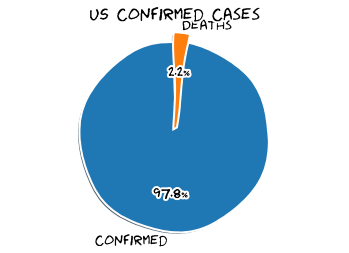

US Population
330362592
US Confirmed
11041979 (3.342381754893121% of population)
US Deaths
245845

New York City Confirmed
282056 (3.383257662966573% of population)
New York City Deaths
24109

Philippines Confirmed
409574
Philippines Deaths
7839



In [11]:
# quick summary
us_details()

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[(ny['admin2'] == 'Queens') | (ny['admin2'] == 'Kings') | (ny['admin2'] == 'New York') | (ny['admin2'] == 'Bronx') | (ny['admin2'] == 'Richmond')]
nyc_confirmed = nyc['confirmed'].sum()
nyc_deaths = nyc['deaths'].sum()
# from https://www.census.gov/quickfacts/newyorkcitynewyork
nyc_population = 8336817

nyc_confirmed_perc_of_pop = (nyc_confirmed/nyc_population) * 100
nyc_deaths_perc_of_confirmed = (nyc_deaths/nyc_confirmed) * 100

print('New York City Confirmed')
print('{0} ({1}% of population)'.format(nyc_confirmed, nyc_confirmed_perc_of_pop))
print('New York City Deaths')
print(nyc_deaths)
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

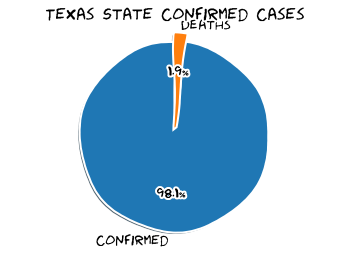

Texas State Total Population
28701845
Texas State Confirmed
1059753 (3.6922818027900295% of population)
Texas State Deaths
20002 (1.8874209367654537% of confirmed)



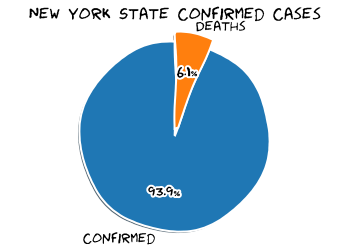

New York State Total Population
19542209
New York State Confirmed
560200 (2.8666155397273663% of population)
New York State Deaths
33904 (6.052124241342378% of confirmed)



In [12]:
state_details('Texas')
state_details('New York')

In [13]:
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
8,New York,US,1605533227000,40.710881,-73.816847,82356,0,7322,75034,Queens,36081,"Queens, New York, US",3654.001272,None,None,84036081,USA
10,New York,US,1605533227000,40.636182,-73.949356,81371,0,7452,73919,Kings,36047,"Kings, New York, US",3178.675129,None,None,84036047,USA
19,New York,US,1605533227000,40.852093,-73.862828,58712,0,5020,53692,Bronx,36005,"Bronx, New York, US",4139.875209,None,None,84036005,USA
21,New York,US,1605533227000,40.740665,-73.589419,54014,0,2231,51783,Nassau,36059,"Nassau, New York, US",3980.620875,None,None,84036059,USA
22,New York,US,1605533227000,40.883201,-72.801217,53308,0,2026,51282,Suffolk,36103,"Suffolk, New York, US",3610.183116,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,New York,US,1605533227000,42.780810,-76.824971,209,0,5,204,Seneca,36099,"Seneca, New York, US",614.416745,None,None,84036099,USA
2718,New York,US,1605533227000,42.635055,-77.103699,206,0,7,199,Yates,36123,"Yates, New York, US",826.877534,None,None,84036123,USA
2758,New York,US,1605533227000,44.590409,-74.299260,188,0,3,185,Franklin,36033,"Franklin, New York, US",375.834633,None,None,84036033,USA
2888,New York,US,1605533227000,42.588317,-74.443390,143,0,2,141,Schoharie,36095,"Schoharie, New York, US",461.305203,None,None,84036095,USA


In [14]:
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
8,New York,US,1605533227000,40.710881,-73.816847,82356,0,7322,75034,Queens,36081,"Queens, New York, US",3654.001272,None,None,84036081,USA
10,New York,US,1605533227000,40.636182,-73.949356,81371,0,7452,73919,Kings,36047,"Kings, New York, US",3178.675129,None,None,84036047,USA
19,New York,US,1605533227000,40.852093,-73.862828,58712,0,5020,53692,Bronx,36005,"Bronx, New York, US",4139.875209,None,None,84036005,USA
32,New York,US,1605533227000,40.767273,-73.971526,39975,0,3208,36767,New York,36061,"New York, New York, US",2454.402452,None,None,84036061,USA
108,New York,US,1605533227000,40.585822,-74.148086,19642,0,1107,18535,Richmond,36085,"Richmond, New York, US",4125.231286,None,None,84036085,USA


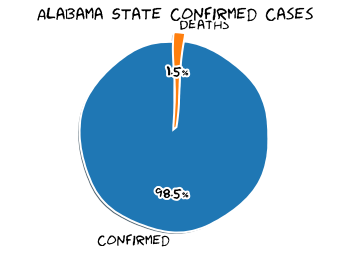

Alabama State Total Population
4887871
Alabama State Confirmed
217822 (4.45637783812216% of population)
Alabama State Deaths
3248 (1.4911257816014911% of confirmed)



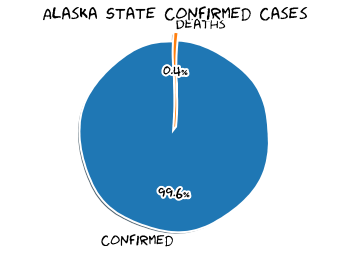

Alaska State Total Population
737438
Alaska State Confirmed
23814 (3.2292884283153294% of population)
Alaska State Deaths
98 (0.411522633744856% of confirmed)



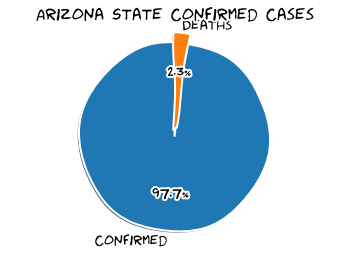

Arizona State Total Population
7171646
Arizona State Confirmed
275436 (3.840624593015327% of population)
Arizona State Deaths
6302 (2.288008829637375% of confirmed)



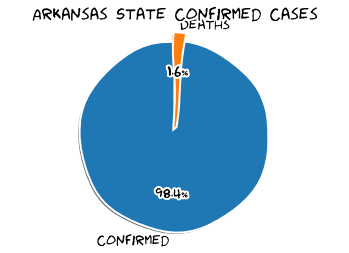

Arkansas State Total Population
3013825
Arkansas State Confirmed
133040 (4.414323990278135% of population)
Arkansas State Deaths
2183 (1.6408598917618762% of confirmed)



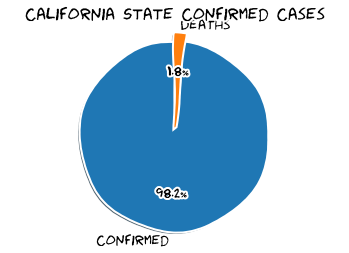

California State Total Population
39557045
California State Confirmed
1032932 (2.611246618649093% of population)
California State Deaths
18265 (1.7682674174098585% of confirmed)



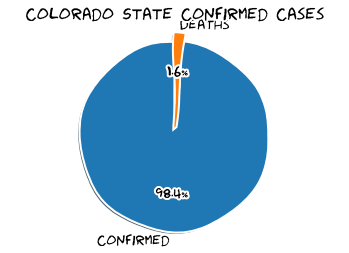

Colorado State Total Population
5695564
Colorado State Confirmed
163417 (2.86919785292554% of population)
Colorado State Deaths
2546 (1.557977444207151% of confirmed)



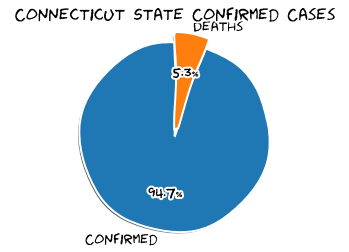

Connecticut State Total Population
3572665
Connecticut State Confirmed
88645 (2.4812010082109577% of population)
Connecticut State Deaths
4737 (5.343787015624119% of confirmed)



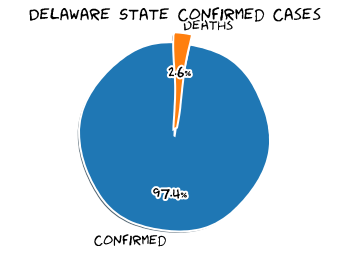

Delaware State Total Population
967171
Delaware State Confirmed
28803 (2.9780669602376415% of population)
Delaware State Deaths
736 (2.555289379578516% of confirmed)



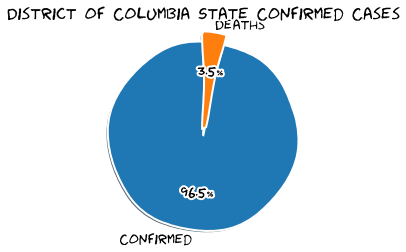

District of Columbia State Total Population
702455
District of Columbia State Confirmed
18977 (2.701525364614103% of population)
District of Columbia State Deaths
660 (3.4778942930916372% of confirmed)



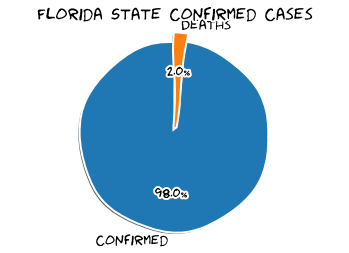

Florida State Total Population
21299325
Florida State Confirmed
885201 (4.156004943818642% of population)
Florida State Deaths
17518 (1.9789855637307234% of confirmed)



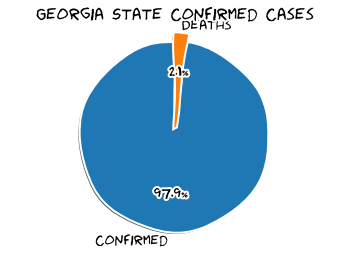

Georgia State Total Population
10519475
Georgia State Confirmed
424989 (4.040021008652999% of population)
Georgia State Deaths
8957 (2.1075839609966374% of confirmed)



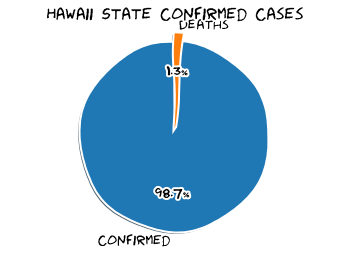

Hawaii State Total Population
1420491
Hawaii State Confirmed
16759 (1.1798033215275563% of population)
Hawaii State Deaths
222 (1.3246613759770869% of confirmed)



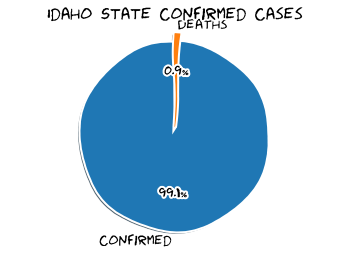

Idaho State Total Population
1754208
Idaho State Confirmed
82245 (4.688440595413999% of population)
Idaho State Deaths
759 (0.9228524530366587% of confirmed)



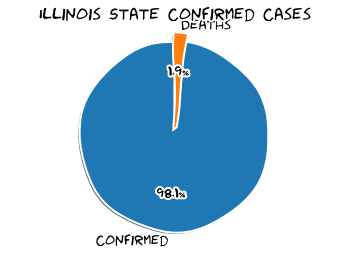

Illinois State Total Population
12741080
Illinois State Confirmed
573616 (4.502098723185162% of population)
Illinois State Deaths
11162 (1.945901090625087% of confirmed)



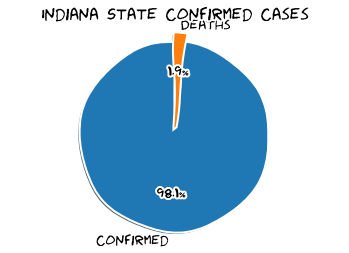

Indiana State Total Population
6691878
Indiana State Confirmed
251597 (3.759736803330844% of population)
Indiana State Deaths
4660 (1.8521683485892122% of confirmed)



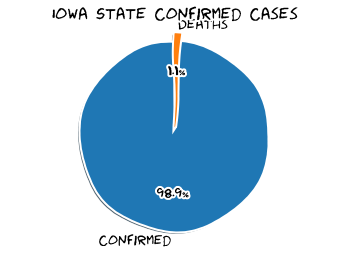

Iowa State Total Population
3156145
Iowa State Confirmed
187001 (5.924981266703526% of population)
Iowa State Deaths
1989 (1.0636306757717873% of confirmed)



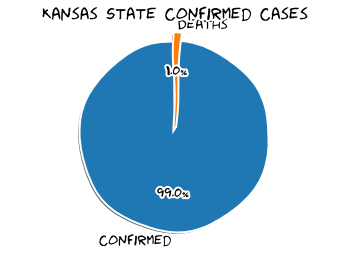

Kansas State Total Population
2911510
Kansas State Confirmed
117564 (4.037904729848086% of population)
Kansas State Deaths
1184 (1.0071110203803886% of confirmed)



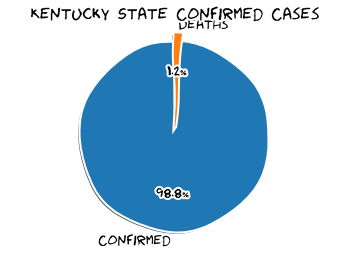

Kentucky State Total Population
4468402
Kentucky State Confirmed
137586 (3.079087333682153% of population)
Kentucky State Deaths
1661 (1.207244923175323% of confirmed)



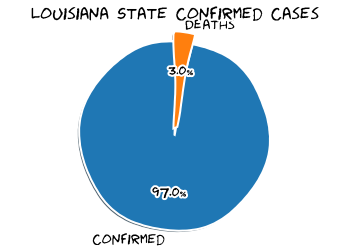

Louisiana State Total Population
4659978
Louisiana State Confirmed
201981 (4.334376685898517% of population)
Louisiana State Deaths
6121 (3.0304830652388097% of confirmed)



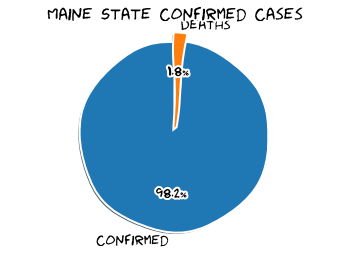

Maine State Total Population
1338404
Maine State Confirmed
8944 (0.6682586124966752% of population)
Maine State Deaths
165 (1.8448121645796063% of confirmed)



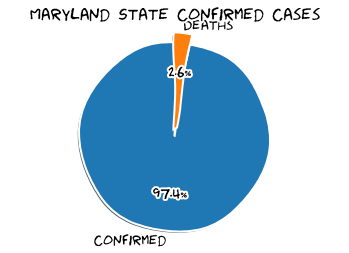

Maryland State Total Population
6042718
Maryland State Confirmed
165930 (2.7459497530746924% of population)
Maryland State Deaths
4289 (2.5848249261736878% of confirmed)



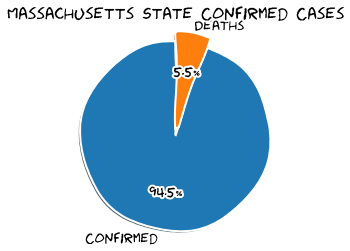

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
188275 (2.727773625286849% of population)
Massachusetts State Deaths
10329 (5.486124020714381% of confirmed)



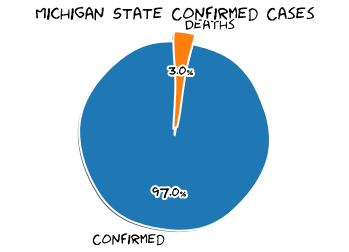

Michigan State Total Population
9995915
Michigan State Confirmed
275792 (2.7590470707283923% of population)
Michigan State Deaths
8376 (3.0370714161396997% of confirmed)



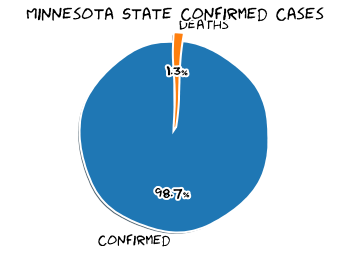

Minnesota State Total Population
5611179
Minnesota State Confirmed
223581 (3.984563671912801% of population)
Minnesota State Deaths
2961 (1.3243522481785124% of confirmed)



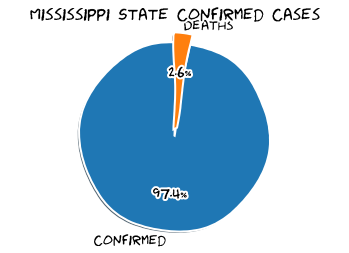

Mississippi State Total Population
2986530
Mississippi State Confirmed
134309 (4.4971589101733445% of population)
Mississippi State Deaths
3543 (2.637946824114542% of confirmed)



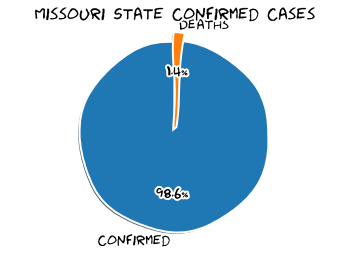

Missouri State Total Population
6126452
Missouri State Confirmed
247524 (4.040250376563793% of population)
Missouri State Deaths
3399 (1.3732001745285307% of confirmed)



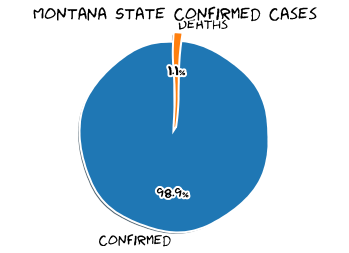

Montana State Total Population
1062305
Montana State Confirmed
47158 (4.439214726467446% of population)
Montana State Deaths
520 (1.1026761100979685% of confirmed)



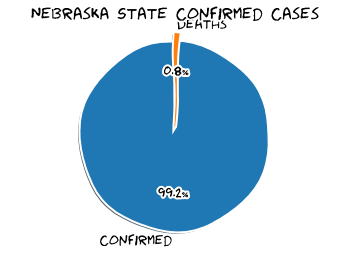

Nebraska State Total Population
1929268
Nebraska State Confirmed
98161 (5.087991922324944% of population)
Nebraska State Deaths
779 (0.7935941972881286% of confirmed)



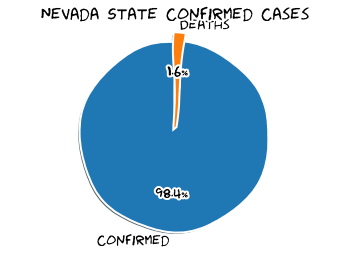

Nevada State Total Population
3034392
Nevada State Confirmed
120183 (3.9606945971384055% of population)
Nevada State Deaths
1909 (1.5884110065483472% of confirmed)



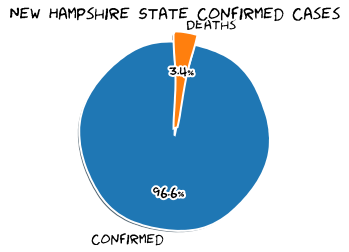

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
14682 (1.0823777809559898% of population)
New Hampshire State Deaths
499 (3.3987195205012943% of confirmed)



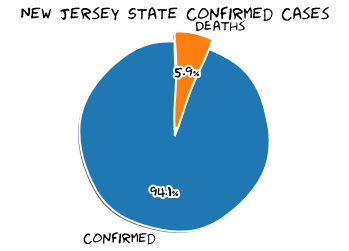

New Jersey State Total Population
8908520
New Jersey State Confirmed
279274 (3.134909053355664% of population)
New Jersey State Deaths
16566 (5.931808904516711% of confirmed)



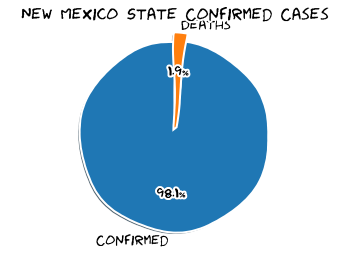

New Mexico State Total Population
2095428
New Mexico State Confirmed
64201 (3.0638609391494245% of population)
New Mexico State Deaths
1215 (1.8924938863880625% of confirmed)



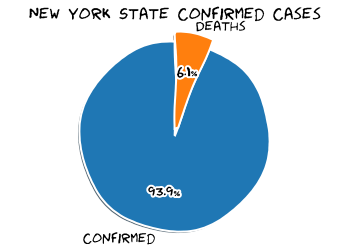

New York State Total Population
19542209
New York State Confirmed
560200 (2.8666155397273663% of population)
New York State Deaths
33904 (6.052124241342378% of confirmed)



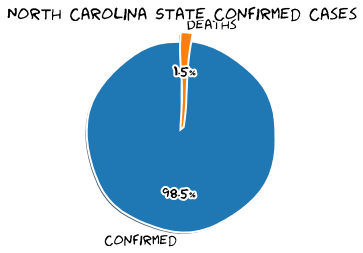

North Carolina State Total Population
10383620
North Carolina State Confirmed
312235 (3.0069956335073895% of population)
North Carolina State Deaths
4806 (1.5392252630230436% of confirmed)



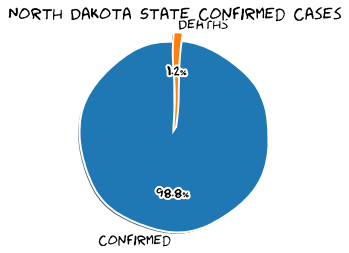

North Dakota State Total Population
760077
North Dakota State Confirmed
63796 (8.393360146406218% of population)
North Dakota State Deaths
736 (1.153677346542103% of confirmed)



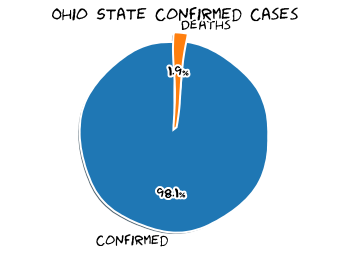

Ohio State Total Population
11689442
Ohio State Confirmed
298096 (2.5501302799569046% of population)
Ohio State Deaths
5722 (1.919515860662337% of confirmed)



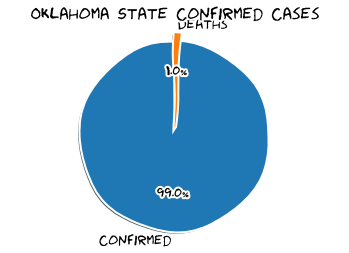

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
154128 (3.9088235361249417% of population)
Oklahoma State Deaths
1528 (0.9913837849060522% of confirmed)



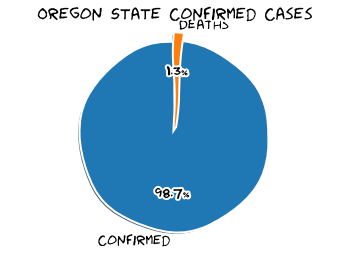

Oregon State Total Population
4190713
Oregon State Confirmed
56880 (1.3572869342281373% of population)
Oregon State Deaths
761 (1.3379043600562588% of confirmed)



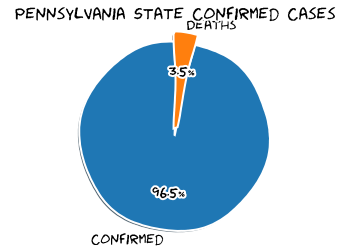

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
268696 (2.0980303051598104% of population)
Pennsylvania State Deaths
9290 (3.457438890046744% of confirmed)



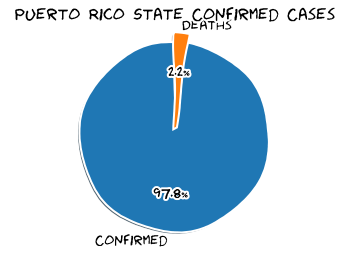

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
43016 (1.346289207433885% of population)
Puerto Rico State Deaths
942 (2.189882834294216% of confirmed)



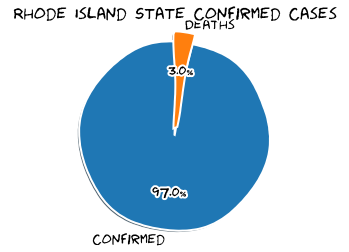

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
41529 (3.9277793278256716% of population)
Rhode Island State Deaths
1254 (3.0195766813551974% of confirmed)



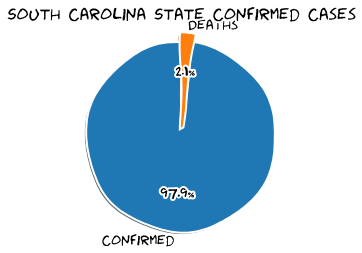

South Carolina State Total Population
5084127
South Carolina State Confirmed
195507 (3.8454389514660043% of population)
South Carolina State Deaths
4112 (2.103249500017902% of confirmed)



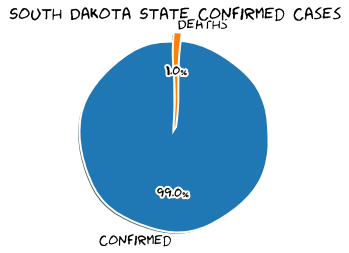

South Dakota State Total Population
882235
South Dakota State Confirmed
65381 (7.4108372485788925% of population)
South Dakota State Deaths
644 (0.9849956409354399% of confirmed)



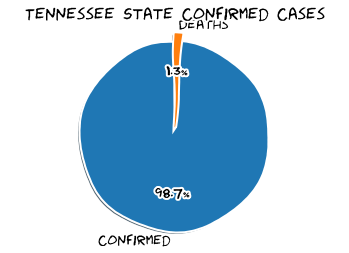

Tennessee State Total Population
6770010
Tennessee State Confirmed
310937 (4.592858799322305% of population)
Tennessee State Deaths
3893 (1.252022113804404% of confirmed)



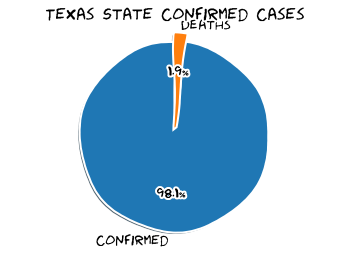

Texas State Total Population
28701845
Texas State Confirmed
1059753 (3.6922818027900295% of population)
Texas State Deaths
20002 (1.8874209367654537% of confirmed)



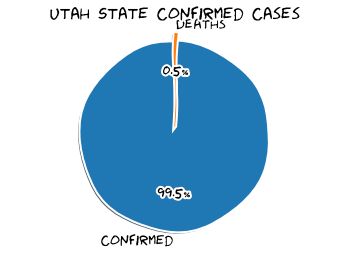

Utah State Total Population
3161105
Utah State Confirmed
153808 (4.8656403377932715% of population)
Utah State Deaths
718 (0.4668157703110371% of confirmed)



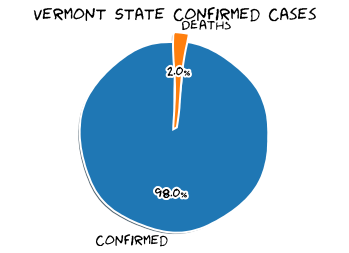

Vermont State Total Population
626299
Vermont State Confirmed
2889 (0.46128127300219224% of population)
Vermont State Deaths
59 (2.0422291450328833% of confirmed)



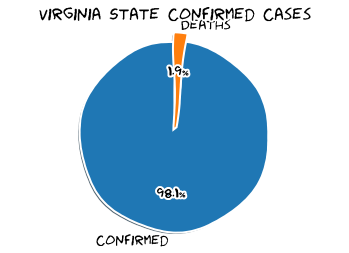

Virginia State Total Population
8517685
Virginia State Confirmed
201960 (2.371066786339246% of population)
Virginia State Deaths
3800 (1.881560705090117% of confirmed)



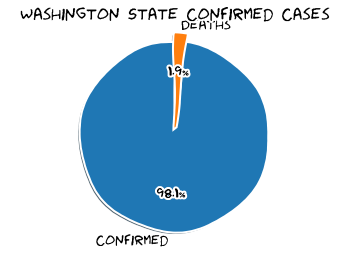

Washington State Total Population
7535591
Washington State Confirmed
130040 (1.7256775215109206% of population)
Washington State Deaths
2519 (1.9370962780682868% of confirmed)



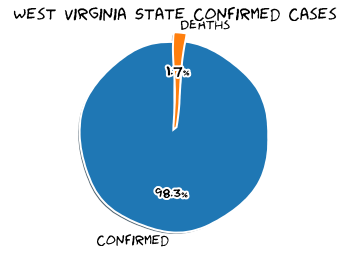

West Virginia State Total Population
1805832
West Virginia State Confirmed
33659 (1.8639053909776766% of population)
West Virginia State Deaths
582 (1.729106628242075% of confirmed)



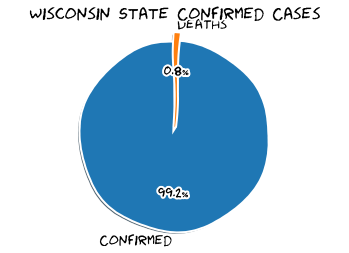

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
329924 (5.675069079780266% of population)
Wisconsin State Deaths
2751 (0.8338283968429092% of confirmed)



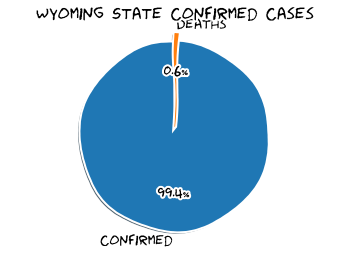

Wyoming State Total Population
577737
Wyoming State Confirmed
22494 (3.893467096620088% of population)
Wyoming State Deaths
144 (0.6401707121899174% of confirmed)



In [15]:
for i in states:
    state_details(i)

In [16]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 54506165},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 1319098},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-11-16T13:27:07.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 35046645},
 'source': 'https://github.com/mathdroid/covid19'}

In [17]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [18]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidentRate,caseFatalityRatio
0,,,,Afghanistan,2020-11-16 05:25:57,33.93911,67.709953,43240,1617,35092,6531,Afghanistan,111.0758868455247,3.7395929694727106
1,,,,Albania,2020-11-16 05:25:57,41.1533,20.1683,27830,623,12889,14318,Albania,967.0581694349852,2.238591448077614
2,,,,Algeria,2020-11-16 05:25:57,28.0339,1.6596,67679,2154,44633,20892,Algeria,154.33840421994068,3.1826711387579603
3,,,,Andorra,2020-11-16 05:25:57,42.5063,1.5218,5872,76,4747,1049,Andorra,7599.818805409953,1.2942779291553133
4,,,,Angola,2020-11-16 05:25:57,-11.2027,17.8739,13451,322,6444,6685,Angola,40.92645991933127,2.3938740614080736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3969,,,,West Bank and Gaza,2020-11-16 05:25:57,31.9522,35.2332,63031,565,54346,8120,West Bank and Gaza,1235.5589114865365,0.8963843188272438
3970,,,,Western Sahara,2020-11-16 05:25:57,24.2155,-12.8858,10,1,8,1,Western Sahara,1.674116485025028,10.0
3971,,,,Yemen,2020-11-16 05:25:57,15.552727,48.516388,2072,605,1394,73,Yemen,6.946966482361948,29.198841698841697
3972,,,,Zambia,2020-11-16 05:25:57,-13.133897,27.849332,17123,353,16137,633,Zambia,93.14099750891485,2.061554634117853


In [19]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,California,US,1605533227000,34.308284,-118.228241,339570,0,7269,332301,Los Angeles,06037,"Los Angeles, California, US",3382.472166,None,None,84006037,USA
1,Illinois,US,1605533227000,41.841448,-87.816588,251101,0,5996,245105,Cook,17031,"Cook, Illinois, US",4875.526991,None,None,84017031,USA
2,Florida,US,1605533227000,25.611236,-80.551706,202644,0,3709,198935,Miami-Dade,12086,"Miami-Dade, Florida, US",7458.537914,None,None,84012086,USA
3,Arizona,US,1605533227000,33.348359,-112.491815,176204,0,3798,172406,Maricopa,04013,"Maricopa, Arizona, US",3928.377626,None,None,84004013,USA
4,Texas,US,1605533227000,29.858649,-95.393395,174493,0,2909,171584,Harris,48201,"Harris, Texas, US",3702.121114,None,None,84048201,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,Nevada,US,1605533227000,37.784367,-117.632000,3,0,0,3,Esmeralda,32009,"Esmeralda, Nevada, US",343.642612,None,None,84032009,USA
3235,Idaho,US,1605533227000,NaN,NaN,2,0,0,2,Unassigned,90016,"Unassigned, Idaho, US",NaN,None,None,84090016,USA
3236,North Carolina,US,1605533227000,NaN,NaN,1,0,0,1,Unassigned,90037,"Unassigned, North Carolina, US",NaN,None,None,84090037,USA
3237,Oregon,US,1605533227000,44.726982,-120.028143,1,0,0,1,Wheeler,41069,"Wheeler, Oregon, US",75.075075,None,None,84041069,USA


In [20]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
8,New York,US,1605533227000,40.710881,-73.816847,82356,0,7322,75034,Queens,36081,"Queens, New York, US",3654.001272,None,None,84036081,USA
10,New York,US,1605533227000,40.636182,-73.949356,81371,0,7452,73919,Kings,36047,"Kings, New York, US",3178.675129,None,None,84036047,USA
19,New York,US,1605533227000,40.852093,-73.862828,58712,0,5020,53692,Bronx,36005,"Bronx, New York, US",4139.875209,None,None,84036005,USA
21,New York,US,1605533227000,40.740665,-73.589419,54014,0,2231,51783,Nassau,36059,"Nassau, New York, US",3980.620875,None,None,84036059,USA
22,New York,US,1605533227000,40.883201,-72.801217,53308,0,2026,51282,Suffolk,36103,"Suffolk, New York, US",3610.183116,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,New York,US,1605533227000,42.780810,-76.824971,209,0,5,204,Seneca,36099,"Seneca, New York, US",614.416745,None,None,84036099,USA
2718,New York,US,1605533227000,42.635055,-77.103699,206,0,7,199,Yates,36123,"Yates, New York, US",826.877534,None,None,84036123,USA
2758,New York,US,1605533227000,44.590409,-74.299260,188,0,3,185,Franklin,36033,"Franklin, New York, US",375.834633,None,None,84036033,USA
2888,New York,US,1605533227000,42.588317,-74.443390,143,0,2,141,Schoharie,36095,"Schoharie, New York, US",461.305203,None,None,84036095,USA


In [21]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

560200

In [22]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3


In [23]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
22,None,Philippines,1605533227000,12.879721,121.774017,409574,374366,7839,27369.0,None,None,Philippines,373.76341,None,None,608,PHL,PH


In [24]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
